<a href="https://colab.research.google.com/github/gopal-agarwal/Machine-Learning/blob/master/ML_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this problem we will try to predict the class of the flower.
This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length.

In [0]:
#let us import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split



---



---




########################################################################

Now we will load our dataset
This is the first step of ML.

1)Data Collection
########################################################################


In [0]:
iris = datasets.load_iris()

In [3]:
#this dataset is a json data
iris_data = iris.data
iris_features = iris.feature_names
iris_target = iris.target
print(len(iris_data))
print(iris_features)
print(iris.target_names)

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(iris_data, columns = iris_features)
df['class'] = iris_target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




---



---



########################################################################

2) Data preprocessing, visualisation and modelling
########################################################################

In [5]:
#This is relatively a very small data set with 150 samples.
#Since the dataframe has four features (Sepal length, sepal width, 
#petal length and petal width) with 150 samples belonging to either of 
#the three target classes

print(df.shape)

(150, 5)


In [6]:
#let us find out the standard deviation, mean, minimum value 
# and the four quartile percentile of the data.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df1=df['class'].value_counts()
print (df1)

#Since it is a pre defined data set every class has equal number of samples. That is 50 per class.

2    50
1    50
0    50
Name: class, dtype: int64


In [8]:
# Dealing with missing values
# Number of variables with missing values
variables_missing_value = df.isnull().sum()
variables_missing_value 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

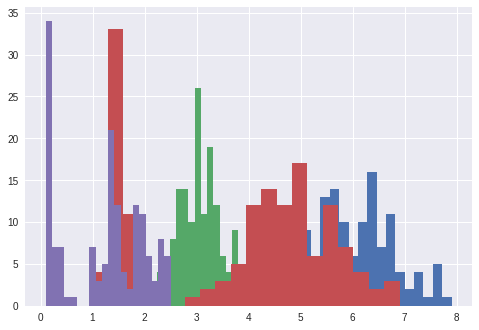

In [9]:
# Treat Outliers

# before that lets visualise all our features
for feature in iris_features:
  df[feature].hist(bins=20)

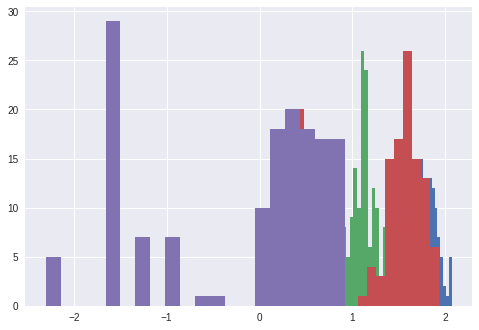

In [12]:
# Now lets normalise the data using log transformation
for feature in iris_features:
  df[feature] = np.log(df[feature])
  df[feature].hist(bins=20)

In [0]:
# Now lets divide the dataset into train and test sets

#We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 70:30


X = df.values[:,0:4]
Y = df.values[:,4]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)



---



---



########################################################################

4) Model Generation
########################################################################

In [0]:
model = LogisticRegression()


########################################################################

5) Training the model
########################################################################

In [16]:
model.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

########################################################################

5) Evaluating the Model
########################################################################

In [17]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8888888888888888


In [0]:
# Now try some different Model and evaluate it
